## Predicting New York City Apartment Price 

In [1]:
import pandas as pd

rent = pd.read_csv('./data/rent.csv')

In [2]:
rent.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[u'https://photos.renthop.com/2/7211212_1ed454...,3000,792 Metropolitan Avenue
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[u'Doorman', u'Elevator', u'Fitness Center', u...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[u'https://photos.renthop.com/2/7150865_be3306...,5465,808 Columbus Avenue
2,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[u'Laundry In Building', u'Dishwasher', u'Hard...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[u'https://photos.renthop.com/2/6887163_de85c4...,2850,241 W 13 Street
3,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[u'Hardwood Floors', u'No Fee']",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[u'https://photos.renthop.com/2/6888711_6e660c...,3275,333 East 49th Street
4,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[u'Pre-War'],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[u'https://photos.renthop.com/2/6934781_1fa4b4...,3350,500 West 143rd Street


In [3]:
prices = rent['price']

avg_rent = prices.mean()
print('Average Rent: ',avg_rent)

('Average Rent: ', 3825.6190476190477)


In [4]:
bybaths = rent.groupby(['bathrooms']).mean()
bybaths = bybaths.reset_index()
print(bybaths[['bathrooms','price']])

   bathrooms      price
0        1.0  3187.6875
1        1.5  3000.0000
2        2.0  6583.7500


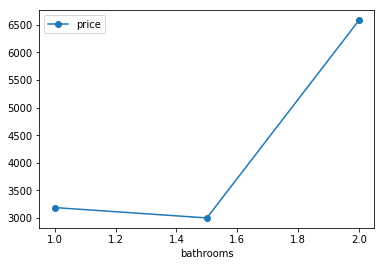

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

bybaths.plot.line('bathrooms','price', style='-o');

In [6]:
X,y = rent[['bedrooms','bathrooms','latitude','longitude']], rent['price']

In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)

model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
unknown_x = [2, 1, 40.7957, -73.97]

In [9]:
pred_y = model.predict([unknown_x])
print(pred_y)

[4033.5]


In [10]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X)
e = mean_absolute_error(y, predictions)
ep = e*100.0/y.mean()
print('Average Error: ',e, 'Error %: ', ep)

('Average Error: ', 322.19047619047626, 'Error %: ', 8.421917398989272)


### Checking Model Generality

In [11]:
from sklearn.model_selection import train_test_split

X, y = rent[['bedrooms','bathrooms','latitude','longitude']], rent['price']
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor(n_estimators=10)
model.fit(Xtrain,ytrain)

validation_e = mean_absolute_error(ytest, model.predict(Xtest))

In [12]:
print('Average Error: ', validation_e, 'Error %', validation_e*100.0/y.mean())

('Average Error: ', 645.5600000000001, 'Error %', 16.87465458438099)


In [13]:
# changing hyper-parameter
model = RandomForestRegressor(n_estimators=100)
model.fit(Xtrain,ytrain)

e = mean_absolute_error(ytest, model.predict(Xtest))

print('Average Error: ',e, 'Error %', e*100.0/y.mean())

('Average Error: ', 563.534, 'Error %', 14.730531006497548)


## Predicting Breast cancer

In [14]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
df = pd.DataFrame(X, columns=cancer.feature_names)

In [15]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
features = ['radius error', 'texture error', 'concave points error',
            'symmetry error', 'worst texture', 'worst smoothness',
            'worst symmetry']

df = df[features]
print('target[0:30]: ', y[0:30])
df.head()

('target[0:30]: ', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0]))


,radius error,texture error,concave points error,symmetry error,worst texture,worst smoothness,worst symmetry
0,1.0950,0.9053,0.01587,0.03003,17.33,0.1622,0.4601
1,0.5435,0.7339,0.01340,0.01389,23.41,0.1238,0.2750
2,0.7456,0.7869,0.02058,0.02250,25.53,0.1444,0.3613
3,0.4956,1.1560,0.01867,0.05963,26.50,0.2098,0.6638
4,0.7572,0.7813,0.01885,0.01756,16.67,0.1374,0.2364


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.15)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rndf = RandomForestClassifier(n_estimators=300)

rndf.fit(X_train, y_train)
validation_e = rndf.score(X_test, y_test)

In [19]:
print('Validation Accuracy: ',validation_e)

('Validation Accuracy: ', 0.9069767441860465)


## Classifying Hand Written Digits

In [21]:
addr640 = pd.read_csv('./data/640.csv')

print(addr640.digit.values)
addr640 = addr640.drop('digit', axis=1)

[6 4 0]


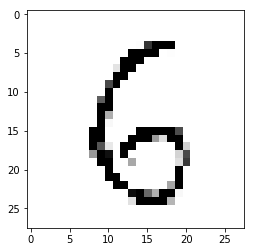

In [23]:
six_img = addr640.iloc[0].values
img28X28 = six_img.reshape(28,28)
plt.imshow(img28X28, cmap='binary');

In [26]:
digits = pd.read_csv('./data/mnist-10k-sample.csv')

images = digits.drop('digit',axis=1)
targets = digits['digit']

In [27]:
from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier(n_estimators=900, n_jobs=-1)
cl.fit(images,targets)
pred = cl.predict(addr640)
print(pred)

[6 7 0]


In [28]:
import numpy as np
np.set_printoptions(precision=3)

digit_value = range(10)
prob = cl.predict_proba(addr640)
prob_2nd = prob[1]
print(prob_2nd)

[0.02  0.123 0.092 0.136 0.1   0.089 0.053 0.247 0.029 0.111]


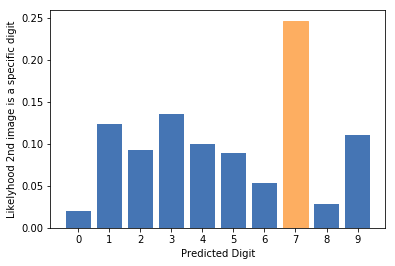

In [30]:
pred_digit = np.argmax(prob_2nd)

bars = plt.bar(digit_value, prob_2nd, color='#4575b4')
bars[pred_digit].set_color('#fdae61')
plt.xlabel('Predicted Digit')
plt.xticks(digit_value)
plt.ylabel('Likelyhood 2nd image is a specific digit');

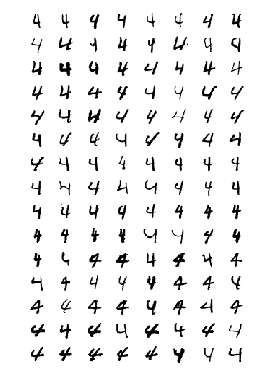

In [31]:
fours = images[targets==4] # find all "4" images

fig, axes = plt.subplots(15, 8, figsize=(4,6.5))
for i, ax in enumerate(axes.flat):
    img = fours.iloc[i,:].values.reshape(28,28)
    ax.axis('off')
    ax.imshow(img, cmap='binary')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.2)

clf = RandomForestClassifier(n_estimators=900, n_jobs=-1)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print(acc)

0.9535


In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='newton-cg', multi_class='multinomial')
lr.fit(X_train, y_train)

lr_score = lr.score(X_test, y_test)
print(lr_score)

0.9075
